# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp4 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

# Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [11]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1324404356150644738
1324404356347650048
1324404356549120000
1324404356725301259
1324404357765435402
1324404358067486720
1324404358713364482
1324404358717595649
1324404359325753345
1324404359946358784
1324404360567164928
1324404361846493189
1324404362077261825
1324404362886656003
1324404363507441671
1324404363939512321
1324404364170199044
1324404364388302848
1324404365877280768
1324404366556696578
1324404366745477123
1324404369626943489
1324404370721615874
1324404370759426048
1324404371275292672
1324404371350802432
1324404371686412289
1324404371740889094
1324404370839134208
1324404372651069440
1324404372961329153
1324404373779288067
1324404373812895752
1324404374303625216
1324404376178446339
1324404376350457859
1324404376312729601
1324404377151557637
1324404377503834116
1324404377604554756
1324404379034607616
1324404380049747969
1324404380276281346
1324404381400420352
1324404381408743424
1324404381903708160
1324404382969044992
1324404383367360512
1324404383505883145
1324404384877449216


1324404559742177282
1324404559977078789
1324404560165707776
1324404560425869312
1324404560857829379
1324404561633837057
1324404561948430337
1324404562611101697
1324404562766290949
1324404563319947264
1324404563592531974
1324404563823177728
1324404563961647104
1324404563986812928
1324404564523581441
1324404564821495816
1324404565060571139
1324404565043806209
1324404565756780544
1324404566134312964
1324404566134345729
1324404566520176640
1324404568860622848
1324404569540100097
1324404569783341062
1324404569976102912
1324404570026553351
1324404570194403331
1324404570194403328
1324404572069240833
1324404574883598336
1324404575407923200
1324404576586518533
1324404577203081217
1324404577723125761
1324404578117365765
1324404578629095424
1324404578549260288
1324404579585413120
1324404579983785985
1324404581523140608
1324404581955178496
1324404582483636224
1324404583020535809
1324404583175630848
1324404583553224705
1324404584169852928
1324404584455065600
1324404584400367617
1324404584585068545


1324404774628810752
1324404774863863809
1324404775765659652
1324404777019707392
1324404777162334208
1324404777871093762
1324404777858617344
1324404778030505985
1324404778999435265
1324404779683110915
1324404779594952706
1324404780102492160
1324404780635140096
1324404781255983108
1324404781868343296
1324404781725765632
1324404782753370113
1324404783701217289
1324404784749662208
1324404785458614275
1324404785227902976
1324404785852878849
1324404786343665665
1324404788012978176
1324404788075941888
1324404789166395401
1324404789350821888
1324404789648723968
1324404790223425536
1324404791116730368
1324404790927986690
1324404791200677888
1324404791255031808
1324404791041232900
1324404791607496705
1324404791846432769
1324404792400191490
1324404792224059394
1324404792454750208
1324404792437997571
1324404792572215298
1324404793335599106
1324404793750753285
1324404793725636610
1324404793197166595
1324404793251667968
1324404793998192640
1324404794707070976
1324404795009044484
1324404795298426882


1324404944129167360
1324404944502431751
1324404944858947584
1324404945022582784
1324404945353846784
1324404945303556109
1324404945878134784
1324404946587049990
1324404946574413827
1324404947358830594
1324404947681763330
1324404948046667776
1324404948285743104
1324404948789067776
1324404949292326917
1324404949908922370
1324404950181519360
1324404951225958402
1324404951284678657
1324404953545363457
1324404954371706884
1324404955088855041
1324404955910987776
1324404955978104837
1324404956758183938
1324404957534146560
1324404957735432193
1324404958331109379
1324404959094411264
1324404959266426882
1324404959710978050
1324404960893820928
1324404961107714048
1324404960650514433
1324404961489334273
1324404961875210243
1324404962227617793
1324404962613358593
1324404963452346368
1324404964211462144
1324404964815503362
1324404965062922241
1324404965411033090
1324404965067116550
1324404965562089472
1324404967109758977
1324404967420108801
1324404967558598659
1324404968082886657
1324404968716206080


1324405139390799882
1324405139306930176
1324405140628013057
1324405141018128385
1324405141387251712
1324405141592805384
1324405141903151111
1324405142096093186
1324405142419025920
1324405141643186188
1324405142838456321
1324405142930755585
1324405142947532805
1324405143161372674
1324405143194857474
1324405144230989824
1324405144692363265
1324405144738504704
1324405145548001281
1324405145694736384
1324405145636118528
1324405147531800576
1324405148257570816
1324405149796835330
1324405149943713794
1324405150203760641
1324405152464297984
1324405152556732416
1324405152762134528
1324405153047449602
1324405153223577600
1324405153445924864
1324405153726943232
1324405154007912449
1324405154809040896
1324405155165593600
1324405155618578433
1324405156172255234
1324405156449058817
1324405156767797252
1324405157799600131
1324405157887692802
1324405158156115970
1324405158776897540
1324405160538447872
1324405160563658754
1324405160941113352
1324405161155043330
1324405161234759685
1324405161666686976


1324405337177362433
1324405337953361921
1324405337970102273
1324405338003701760
1324405337877704704
1324405338234408961
1324405338892808192
1324405339857584128
1324405340130127876
1324405340490838016
1324405340700631043
1324405340629278721
1324405341451214848
1324405342361571328
1324405342747430917
1324405342768431106
1324405342889889797
1324405343116529665
1324405343506542592
1324405343422763008
1324405343514992645
1324405343498153988
1324405344278323203
1324405344462929920
1324405344504827904
1324405344362237952
1324405345012326402
1324405345977061376
1324405346295832576
1324405346132250624
1324405347164053506
1324405347662979073
1324405348162134018
1324405348757811205
1324405348887920640
1324405349647089664
1324405349940711430
1324405351270256648
1324405351526076416
1324405352381640704
1324405351551242242
1324405353111584769
1324405354122366976
1324405355007352833
1324405355191873536
1324405355196092425
1324405355317616640
1324405355334520833
1324405355506401281
1324405355565166592


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
# geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 05 17:38:19 +0000 2020'
'Thu Nov 05 17:38:19 +0000 2020'
'Thu Nov 05 17:38:19 +0000 2020'
'Thu Nov 05 17:38:19 +0000 2020'
'Thu Nov 05 17:38:19 +0000 2020'
'Thu Nov 05 17:38:19 +0000 2020'
'Thu Nov 05 17:38:19 +0000 2020'
'Thu Nov 05 17:38:18 +0000 2020'
'Thu Nov 05 17:38:18 +0000 2020'
'Thu Nov 05 17:38:18 +0000 2020'
'Thu Nov 05 17:38:18 +0000 2020'
'Thu Nov 05 17:38:18 +0000 2020'
'Thu Nov 05 17:38:17 +0000 2020'
'Thu Nov 05 17:38:17 +0000 2020'
'Thu Nov 05 17:38:17 +0000 2020'
'Thu Nov 05 17:38:17 +0000 2020'
'Thu Nov 05 17:38:17 +0000 2020'
'Thu Nov 05 17:38:17 +0000 2020'
'Thu Nov 05 17:38:17 +0000 2020'
'Thu Nov 05 17:38:17 +0000 2020'
'Thu Nov 05 17:38:16 +0000 2020'
'Thu Nov 05 17:38:16 +0000 2020'
'Thu Nov 05 17:38:16 +0000 2020'
'Thu Nov 05 17:38:16 +0000 2020'
'Thu Nov 05 17:38:16 +0000 2020'
'Thu Nov 05 17:38:16 +0000 2020'
'Thu Nov 05 17:38:16 +0000 2020'
'Thu Nov 05 17:38:16 +0000 2020'
'Thu Nov 05 17:38:16 +0000 2020'
'Thu Nov 05 17:38:16 +0000 2020'
'Thu Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                           max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 05 17:38:02 +0000 2020'
'Thu Nov 05 17:38:01 +0000 2020'
'Thu Nov 05 17:38:01 +0000 2020'
'Thu Nov 05 17:38:01 +0000 2020'
'Thu Nov 05 17:38:00 +0000 2020'
'Thu Nov 05 17:38:00 +0000 2020'
'Thu Nov 05 17:38:00 +0000 2020'
'Thu Nov 05 17:38:00 +0000 2020'
'Thu Nov 05 17:38:00 +0000 2020'
'Thu Nov 05 17:38:00 +0000 2020'
'Thu Nov 05 17:38:00 +0000 2020'
'Thu Nov 05 17:38:00 +0000 2020'
'Thu Nov 05 17:38:00 +0000 2020'
'Thu Nov 05 17:37:59 +0000 2020'
'Thu Nov 05 17:37:59 +0000 2020'
'Thu Nov 05 17:37:59 +0000 2020'
'Thu Nov 05 17:37:59 +0000 2020'
'Thu Nov 05 17:37:59 +0000 2020'
'Thu Nov 05 17:37:59 +0000 2020'
'Thu Nov 05 17:37:58 +0000 2020'
'Thu Nov 05 17:37:58 +0000 2020'
'Thu Nov 05 17:37:58 +0000 2020'
'Thu Nov 05 17:37:58 +0000 2020'
'Thu Nov 05 17:37:58 +0000 2020'
'Thu Nov 05 17:37:58 +0000 2020'
'Thu Nov 05 17:37:58 +0000 2020'
'Thu Nov 05 17:37:58 +0000 2020'
'Thu Nov 05 17:37:57 +0000 2020'
'Thu Nov 05 17:37:57 +0000 2020'
'Thu Nov 05 17:37:57 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:32:50 +0000 2020'
'Thu Nov 05 17:32:49 +0000 2020'
'Thu Nov 05 17:32:49 +0000 2020'
'Thu Nov 05 17:32:49 +0000 2020'
'Thu Nov 05 17:32:49 +0000 2020'
'Thu Nov 05 17:32:49 +0000 2020'
'Thu Nov 05 17:32:49 +0000 2020'
'Thu Nov 05 17:32:49 +0000 2020'
'Thu Nov 05 17:32:49 +0000 2020'
'Thu Nov 05 17:32:48 +0000 2020'
'Thu Nov 05 17:32:48 +0000 2020'
'Thu Nov 05 17:32:48 +0000 2020'
'Thu Nov 05 17:32:47 +0000 2020'
'Thu Nov 05 17:32:47 +0000 2020'
'Thu Nov 05 17:32:47 +0000 2020'
'Thu Nov 05 17:32:47 +0000 2020'
'Thu Nov 05 17:32:47 +0000 2020'
'Thu Nov 05 17:32:47 +0000 2020'
'Thu Nov 05 17:32:46 +0000 2020'
'Thu Nov 05 17:32:46 +0000 2020'
'Thu Nov 05 17:32:46 +0000 2020'
'Thu Nov 05 17:32:46 +0000 2020'
'Thu Nov 05 17:32:46 +0000 2020'
'Thu Nov 05 17:32:46 +0000 2020'
'Thu Nov 05 17:32:46 +0000 2020'
'Thu Nov 05 17:32:46 +0000 2020'
'Thu Nov 05 17:32:46 +0000 2020'
'Thu Nov 05 17:32:46 +0000 2020'
'Thu Nov 05 17:32:45 +0000 2020'
'Thu Nov 05 17:32:45 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:31:22 +0000 2020'
'Thu Nov 05 17:31:19 +0000 2020'
'Thu Nov 05 17:31:00 +0000 2020'
'Thu Nov 05 17:30:47 +0000 2020'
'Thu Nov 05 17:30:42 +0000 2020'
'Thu Nov 05 17:30:31 +0000 2020'
'Thu Nov 05 17:30:19 +0000 2020'
'Thu Nov 05 17:30:15 +0000 2020'
'Thu Nov 05 17:29:35 +0000 2020'
'Thu Nov 05 17:28:56 +0000 2020'
'Thu Nov 05 17:28:47 +0000 2020'
'Thu Nov 05 17:28:23 +0000 2020'
'Thu Nov 05 17:28:22 +0000 2020'
'Thu Nov 05 17:28:13 +0000 2020'
'Thu Nov 05 17:27:37 +0000 2020'
'Thu Nov 05 17:27:30 +0000 2020'
'Thu Nov 05 17:27:11 +0000 2020'
'Thu Nov 05 17:26:56 +0000 2020'
'Thu Nov 05 17:26:14 +0000 2020'
'Thu Nov 05 17:26:10 +0000 2020'
'Thu Nov 05 17:25:03 +0000 2020'
'Thu Nov 05 17:25:00 +0000 2020'
'Thu Nov 05 17:24:50 +0000 2020'
'Thu Nov 05 17:24:29 +0000 2020'
'Thu Nov 05 17:24:14 +0000 2020'
'Thu Nov 05 17:23:24 +0000 2020'
'Thu Nov 05 17:22:32 +0000 2020'
'Thu Nov 05 17:22:06 +0000 2020'
'Thu Nov 05 17:21:50 +0000 2020'
'Thu Nov 05 17:21:22 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:17:54 +0000 2020'
'Thu Nov 05 17:17:54 +0000 2020'
'Thu Nov 05 17:17:54 +0000 2020'
'Thu Nov 05 17:17:53 +0000 2020'
'Thu Nov 05 17:17:53 +0000 2020'
'Thu Nov 05 17:17:53 +0000 2020'
'Thu Nov 05 17:17:53 +0000 2020'
'Thu Nov 05 17:17:53 +0000 2020'
'Thu Nov 05 17:17:53 +0000 2020'
'Thu Nov 05 17:17:53 +0000 2020'
'Thu Nov 05 17:17:53 +0000 2020'
'Thu Nov 05 17:17:53 +0000 2020'
'Thu Nov 05 17:17:53 +0000 2020'
'Thu Nov 05 17:17:52 +0000 2020'
'Thu Nov 05 17:17:52 +0000 2020'
'Thu Nov 05 17:17:52 +0000 2020'
'Thu Nov 05 17:17:52 +0000 2020'
'Thu Nov 05 17:17:52 +0000 2020'
'Thu Nov 05 17:17:52 +0000 2020'
'Thu Nov 05 17:17:52 +0000 2020'
'Thu Nov 05 17:17:52 +0000 2020'
'Thu Nov 05 17:17:52 +0000 2020'
'Thu Nov 05 17:17:51 +0000 2020'
'Thu Nov 05 17:17:51 +0000 2020'
'Thu Nov 05 17:17:51 +0000 2020'
'Thu Nov 05 17:17:51 +0000 2020'
'Thu Nov 05 17:17:51 +0000 2020'
'Thu Nov 05 17:17:50 +0000 2020'
'Thu Nov 05 17:17:50 +0000 2020'
'Thu Nov 05 17:17:50 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:17:14 +0000 2020'
'Thu Nov 05 17:17:14 +0000 2020'
'Thu Nov 05 17:17:14 +0000 2020'
'Thu Nov 05 17:17:13 +0000 2020'
'Thu Nov 05 17:17:13 +0000 2020'
'Thu Nov 05 17:17:13 +0000 2020'
'Thu Nov 05 17:17:12 +0000 2020'
'Thu Nov 05 17:17:12 +0000 2020'
'Thu Nov 05 17:17:12 +0000 2020'
'Thu Nov 05 17:17:12 +0000 2020'
'Thu Nov 05 17:17:12 +0000 2020'
'Thu Nov 05 17:17:12 +0000 2020'
'Thu Nov 05 17:17:12 +0000 2020'
'Thu Nov 05 17:17:12 +0000 2020'
'Thu Nov 05 17:17:12 +0000 2020'
'Thu Nov 05 17:17:12 +0000 2020'
'Thu Nov 05 17:17:11 +0000 2020'
'Thu Nov 05 17:17:11 +0000 2020'
'Thu Nov 05 17:17:11 +0000 2020'
'Thu Nov 05 17:17:11 +0000 2020'
'Thu Nov 05 17:17:11 +0000 2020'
'Thu Nov 05 17:17:11 +0000 2020'
'Thu Nov 05 17:17:10 +0000 2020'
'Thu Nov 05 17:17:10 +0000 2020'
'Thu Nov 05 17:17:10 +0000 2020'
'Thu Nov 05 17:17:10 +0000 2020'
'Thu Nov 05 17:17:10 +0000 2020'
'Thu Nov 05 17:17:10 +0000 2020'
'Thu Nov 05 17:17:10 +0000 2020'
'Thu Nov 05 17:17:09 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:16:27 +0000 2020'
'Thu Nov 05 17:16:27 +0000 2020'
'Thu Nov 05 17:16:27 +0000 2020'
'Thu Nov 05 17:16:27 +0000 2020'
'Thu Nov 05 17:16:26 +0000 2020'
'Thu Nov 05 17:16:26 +0000 2020'
'Thu Nov 05 17:16:26 +0000 2020'
'Thu Nov 05 17:16:26 +0000 2020'
'Thu Nov 05 17:16:26 +0000 2020'
'Thu Nov 05 17:16:25 +0000 2020'
'Thu Nov 05 17:16:25 +0000 2020'
'Thu Nov 05 17:16:25 +0000 2020'
'Thu Nov 05 17:16:25 +0000 2020'
'Thu Nov 05 17:16:24 +0000 2020'
'Thu Nov 05 17:16:24 +0000 2020'
'Thu Nov 05 17:16:24 +0000 2020'
'Thu Nov 05 17:16:24 +0000 2020'
'Thu Nov 05 17:16:24 +0000 2020'
'Thu Nov 05 17:16:24 +0000 2020'
'Thu Nov 05 17:16:23 +0000 2020'
'Thu Nov 05 17:16:23 +0000 2020'
'Thu Nov 05 17:16:23 +0000 2020'
'Thu Nov 05 17:16:23 +0000 2020'
'Thu Nov 05 17:16:22 +0000 2020'
'Thu Nov 05 17:16:22 +0000 2020'
'Thu Nov 05 17:16:22 +0000 2020'
'Thu Nov 05 17:16:22 +0000 2020'
'Thu Nov 05 17:16:22 +0000 2020'
'Thu Nov 05 17:16:22 +0000 2020'
'Thu Nov 05 17:16:21 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:15:42 +0000 2020'
'Thu Nov 05 17:15:42 +0000 2020'
'Thu Nov 05 17:15:42 +0000 2020'
'Thu Nov 05 17:15:42 +0000 2020'
'Thu Nov 05 17:15:42 +0000 2020'
'Thu Nov 05 17:15:42 +0000 2020'
'Thu Nov 05 17:15:42 +0000 2020'
'Thu Nov 05 17:15:42 +0000 2020'
'Thu Nov 05 17:15:41 +0000 2020'
'Thu Nov 05 17:15:41 +0000 2020'
'Thu Nov 05 17:15:41 +0000 2020'
'Thu Nov 05 17:15:41 +0000 2020'
'Thu Nov 05 17:15:41 +0000 2020'
'Thu Nov 05 17:15:41 +0000 2020'
'Thu Nov 05 17:15:40 +0000 2020'
'Thu Nov 05 17:15:40 +0000 2020'
'Thu Nov 05 17:15:40 +0000 2020'
'Thu Nov 05 17:15:40 +0000 2020'
'Thu Nov 05 17:15:40 +0000 2020'
'Thu Nov 05 17:15:39 +0000 2020'
'Thu Nov 05 17:15:39 +0000 2020'
'Thu Nov 05 17:15:39 +0000 2020'
'Thu Nov 05 17:15:39 +0000 2020'
'Thu Nov 05 17:15:39 +0000 2020'
'Thu Nov 05 17:15:38 +0000 2020'
'Thu Nov 05 17:15:38 +0000 2020'
'Thu Nov 05 17:15:38 +0000 2020'
'Thu Nov 05 17:15:38 +0000 2020'
'Thu Nov 05 17:15:38 +0000 2020'
'Thu Nov 05 17:15:37 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:15:04 +0000 2020'
'Thu Nov 05 17:15:04 +0000 2020'
'Thu Nov 05 17:15:04 +0000 2020'
'Thu Nov 05 17:15:04 +0000 2020'
'Thu Nov 05 17:15:04 +0000 2020'
'Thu Nov 05 17:15:04 +0000 2020'
'Thu Nov 05 17:15:04 +0000 2020'
'Thu Nov 05 17:15:03 +0000 2020'
'Thu Nov 05 17:15:03 +0000 2020'
'Thu Nov 05 17:15:03 +0000 2020'
'Thu Nov 05 17:15:03 +0000 2020'
'Thu Nov 05 17:15:02 +0000 2020'
'Thu Nov 05 17:15:02 +0000 2020'
'Thu Nov 05 17:15:02 +0000 2020'
'Thu Nov 05 17:15:02 +0000 2020'
'Thu Nov 05 17:15:02 +0000 2020'
'Thu Nov 05 17:15:02 +0000 2020'
'Thu Nov 05 17:15:02 +0000 2020'
'Thu Nov 05 17:15:02 +0000 2020'
'Thu Nov 05 17:15:01 +0000 2020'
'Thu Nov 05 17:15:01 +0000 2020'
'Thu Nov 05 17:15:01 +0000 2020'
'Thu Nov 05 17:15:01 +0000 2020'
'Thu Nov 05 17:15:00 +0000 2020'
'Thu Nov 05 17:15:00 +0000 2020'
'Thu Nov 05 17:15:00 +0000 2020'
'Thu Nov 05 17:15:00 +0000 2020'
'Thu Nov 05 17:15:00 +0000 2020'
'Thu Nov 05 17:15:00 +0000 2020'
'Thu Nov 05 17:15:00 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:14:18 +0000 2020'
'Thu Nov 05 17:14:18 +0000 2020'
'Thu Nov 05 17:14:18 +0000 2020'
'Thu Nov 05 17:14:18 +0000 2020'
'Thu Nov 05 17:14:18 +0000 2020'
'Thu Nov 05 17:14:18 +0000 2020'
'Thu Nov 05 17:14:18 +0000 2020'
'Thu Nov 05 17:14:17 +0000 2020'
'Thu Nov 05 17:14:17 +0000 2020'
'Thu Nov 05 17:14:17 +0000 2020'
'Thu Nov 05 17:14:17 +0000 2020'
'Thu Nov 05 17:14:17 +0000 2020'
'Thu Nov 05 17:14:17 +0000 2020'
'Thu Nov 05 17:14:16 +0000 2020'
'Thu Nov 05 17:14:16 +0000 2020'
'Thu Nov 05 17:14:16 +0000 2020'
'Thu Nov 05 17:14:16 +0000 2020'
'Thu Nov 05 17:14:16 +0000 2020'
'Thu Nov 05 17:14:16 +0000 2020'
'Thu Nov 05 17:14:16 +0000 2020'
'Thu Nov 05 17:14:16 +0000 2020'
'Thu Nov 05 17:14:15 +0000 2020'
'Thu Nov 05 17:14:15 +0000 2020'
'Thu Nov 05 17:14:15 +0000 2020'
'Thu Nov 05 17:14:15 +0000 2020'
'Thu Nov 05 17:14:14 +0000 2020'
'Thu Nov 05 17:14:14 +0000 2020'
'Thu Nov 05 17:14:14 +0000 2020'
'Thu Nov 05 17:14:14 +0000 2020'
'Thu Nov 05 17:14:14 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:13:36 +0000 2020'
'Thu Nov 05 17:13:36 +0000 2020'
'Thu Nov 05 17:13:36 +0000 2020'
'Thu Nov 05 17:13:36 +0000 2020'
'Thu Nov 05 17:13:36 +0000 2020'
'Thu Nov 05 17:13:36 +0000 2020'
'Thu Nov 05 17:13:36 +0000 2020'
'Thu Nov 05 17:13:36 +0000 2020'
'Thu Nov 05 17:13:35 +0000 2020'
'Thu Nov 05 17:13:35 +0000 2020'
'Thu Nov 05 17:13:35 +0000 2020'
'Thu Nov 05 17:13:35 +0000 2020'
'Thu Nov 05 17:13:35 +0000 2020'
'Thu Nov 05 17:13:35 +0000 2020'
'Thu Nov 05 17:13:35 +0000 2020'
'Thu Nov 05 17:13:34 +0000 2020'
'Thu Nov 05 17:13:34 +0000 2020'
'Thu Nov 05 17:13:34 +0000 2020'
'Thu Nov 05 17:13:34 +0000 2020'
'Thu Nov 05 17:13:34 +0000 2020'
'Thu Nov 05 17:13:34 +0000 2020'
'Thu Nov 05 17:13:34 +0000 2020'
'Thu Nov 05 17:13:34 +0000 2020'
'Thu Nov 05 17:13:34 +0000 2020'
'Thu Nov 05 17:13:33 +0000 2020'
'Thu Nov 05 17:13:33 +0000 2020'
'Thu Nov 05 17:13:33 +0000 2020'
'Thu Nov 05 17:13:33 +0000 2020'
'Thu Nov 05 17:13:32 +0000 2020'
'Thu Nov 05 17:13:32 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:12:54 +0000 2020'
'Thu Nov 05 17:12:54 +0000 2020'
'Thu Nov 05 17:12:54 +0000 2020'
'Thu Nov 05 17:12:54 +0000 2020'
'Thu Nov 05 17:12:54 +0000 2020'
'Thu Nov 05 17:12:54 +0000 2020'
'Thu Nov 05 17:12:53 +0000 2020'
'Thu Nov 05 17:12:53 +0000 2020'
'Thu Nov 05 17:12:53 +0000 2020'
'Thu Nov 05 17:12:53 +0000 2020'
'Thu Nov 05 17:12:53 +0000 2020'
'Thu Nov 05 17:12:53 +0000 2020'
'Thu Nov 05 17:12:53 +0000 2020'
'Thu Nov 05 17:12:52 +0000 2020'
'Thu Nov 05 17:12:52 +0000 2020'
'Thu Nov 05 17:12:52 +0000 2020'
'Thu Nov 05 17:12:52 +0000 2020'
'Thu Nov 05 17:12:52 +0000 2020'
'Thu Nov 05 17:12:51 +0000 2020'
'Thu Nov 05 17:12:51 +0000 2020'
'Thu Nov 05 17:12:51 +0000 2020'
'Thu Nov 05 17:12:51 +0000 2020'
'Thu Nov 05 17:12:51 +0000 2020'
'Thu Nov 05 17:12:51 +0000 2020'
'Thu Nov 05 17:12:50 +0000 2020'
'Thu Nov 05 17:12:50 +0000 2020'
'Thu Nov 05 17:12:49 +0000 2020'
'Thu Nov 05 17:12:49 +0000 2020'
'Thu Nov 05 17:12:49 +0000 2020'
'Thu Nov 05 17:12:49 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:12:08 +0000 2020'
'Thu Nov 05 17:12:08 +0000 2020'
'Thu Nov 05 17:12:08 +0000 2020'
'Thu Nov 05 17:12:07 +0000 2020'
'Thu Nov 05 17:12:07 +0000 2020'
'Thu Nov 05 17:12:07 +0000 2020'
'Thu Nov 05 17:12:07 +0000 2020'
'Thu Nov 05 17:12:07 +0000 2020'
'Thu Nov 05 17:12:07 +0000 2020'
'Thu Nov 05 17:12:07 +0000 2020'
'Thu Nov 05 17:12:06 +0000 2020'
'Thu Nov 05 17:12:06 +0000 2020'
'Thu Nov 05 17:12:06 +0000 2020'
'Thu Nov 05 17:12:06 +0000 2020'
'Thu Nov 05 17:12:06 +0000 2020'
'Thu Nov 05 17:12:06 +0000 2020'
'Thu Nov 05 17:12:06 +0000 2020'
'Thu Nov 05 17:12:06 +0000 2020'
'Thu Nov 05 17:12:06 +0000 2020'
'Thu Nov 05 17:12:06 +0000 2020'
'Thu Nov 05 17:12:06 +0000 2020'
'Thu Nov 05 17:12:05 +0000 2020'
'Thu Nov 05 17:12:05 +0000 2020'
'Thu Nov 05 17:12:05 +0000 2020'
'Thu Nov 05 17:12:05 +0000 2020'
'Thu Nov 05 17:12:05 +0000 2020'
'Thu Nov 05 17:12:05 +0000 2020'
'Thu Nov 05 17:12:05 +0000 2020'
'Thu Nov 05 17:12:04 +0000 2020'
'Thu Nov 05 17:12:04 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:11:22 +0000 2020'
'Thu Nov 05 17:11:22 +0000 2020'
'Thu Nov 05 17:11:22 +0000 2020'
'Thu Nov 05 17:11:22 +0000 2020'
'Thu Nov 05 17:11:22 +0000 2020'
'Thu Nov 05 17:11:21 +0000 2020'
'Thu Nov 05 17:11:21 +0000 2020'
'Thu Nov 05 17:11:21 +0000 2020'
'Thu Nov 05 17:11:21 +0000 2020'
'Thu Nov 05 17:11:21 +0000 2020'
'Thu Nov 05 17:11:21 +0000 2020'
'Thu Nov 05 17:11:20 +0000 2020'
'Thu Nov 05 17:11:20 +0000 2020'
'Thu Nov 05 17:11:20 +0000 2020'
'Thu Nov 05 17:11:20 +0000 2020'
'Thu Nov 05 17:11:20 +0000 2020'
'Thu Nov 05 17:11:20 +0000 2020'
'Thu Nov 05 17:11:20 +0000 2020'
'Thu Nov 05 17:11:20 +0000 2020'
'Thu Nov 05 17:11:19 +0000 2020'
'Thu Nov 05 17:11:19 +0000 2020'
'Thu Nov 05 17:11:19 +0000 2020'
'Thu Nov 05 17:11:19 +0000 2020'
'Thu Nov 05 17:11:19 +0000 2020'
'Thu Nov 05 17:11:19 +0000 2020'
'Thu Nov 05 17:11:19 +0000 2020'
'Thu Nov 05 17:11:18 +0000 2020'
'Thu Nov 05 17:11:18 +0000 2020'
'Thu Nov 05 17:11:18 +0000 2020'
'Thu Nov 05 17:11:18 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:10:39 +0000 2020'
'Thu Nov 05 17:10:39 +0000 2020'
'Thu Nov 05 17:10:38 +0000 2020'
'Thu Nov 05 17:10:38 +0000 2020'
'Thu Nov 05 17:10:38 +0000 2020'
'Thu Nov 05 17:10:38 +0000 2020'
'Thu Nov 05 17:10:37 +0000 2020'
'Thu Nov 05 17:10:37 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:36 +0000 2020'
'Thu Nov 05 17:10:35 +0000 2020'
'Thu Nov 05 17:10:35 +0000 2020'
'Thu Nov 05 17:10:35 +0000 2020'
'Thu Nov 05 17:10:35 +0000 2020'
'Thu Nov 05 17:10:35 +0000 2020'
'Thu Nov 05 17:10:35 +0000 2020'
'Thu Nov 05 17:10:35 +0000 2020'
'Thu Nov 05 17:10:35 +0000 2020'
'Thu Nov 05 17:10:35 +0000 2020'
'Thu Nov 05 17:10:34 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:10:02 +0000 2020'
'Thu Nov 05 17:10:01 +0000 2020'
'Thu Nov 05 17:10:01 +0000 2020'
'Thu Nov 05 17:10:01 +0000 2020'
'Thu Nov 05 17:10:01 +0000 2020'
'Thu Nov 05 17:10:00 +0000 2020'
'Thu Nov 05 17:10:00 +0000 2020'
'Thu Nov 05 17:10:00 +0000 2020'
'Thu Nov 05 17:10:00 +0000 2020'
'Thu Nov 05 17:10:00 +0000 2020'
'Thu Nov 05 17:10:00 +0000 2020'
'Thu Nov 05 17:10:00 +0000 2020'
'Thu Nov 05 17:10:00 +0000 2020'
'Thu Nov 05 17:10:00 +0000 2020'
'Thu Nov 05 17:10:00 +0000 2020'
'Thu Nov 05 17:09:59 +0000 2020'
'Thu Nov 05 17:09:59 +0000 2020'
'Thu Nov 05 17:09:59 +0000 2020'
'Thu Nov 05 17:09:59 +0000 2020'
'Thu Nov 05 17:09:59 +0000 2020'
'Thu Nov 05 17:09:59 +0000 2020'
'Thu Nov 05 17:09:58 +0000 2020'
'Thu Nov 05 17:09:58 +0000 2020'
'Thu Nov 05 17:09:58 +0000 2020'
'Thu Nov 05 17:09:58 +0000 2020'
'Thu Nov 05 17:09:58 +0000 2020'
'Thu Nov 05 17:09:58 +0000 2020'
'Thu Nov 05 17:09:57 +0000 2020'
'Thu Nov 05 17:09:57 +0000 2020'
'Thu Nov 05 17:09:56 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:09:19 +0000 2020'
'Thu Nov 05 17:09:18 +0000 2020'
'Thu Nov 05 17:09:18 +0000 2020'
'Thu Nov 05 17:09:18 +0000 2020'
'Thu Nov 05 17:09:18 +0000 2020'
'Thu Nov 05 17:09:18 +0000 2020'
'Thu Nov 05 17:09:18 +0000 2020'
'Thu Nov 05 17:09:18 +0000 2020'
'Thu Nov 05 17:09:18 +0000 2020'
'Thu Nov 05 17:09:18 +0000 2020'
'Thu Nov 05 17:09:17 +0000 2020'
'Thu Nov 05 17:09:17 +0000 2020'
'Thu Nov 05 17:09:17 +0000 2020'
'Thu Nov 05 17:09:17 +0000 2020'
'Thu Nov 05 17:09:17 +0000 2020'
'Thu Nov 05 17:09:17 +0000 2020'
'Thu Nov 05 17:09:17 +0000 2020'
'Thu Nov 05 17:09:16 +0000 2020'
'Thu Nov 05 17:09:16 +0000 2020'
'Thu Nov 05 17:09:16 +0000 2020'
'Thu Nov 05 17:09:16 +0000 2020'
'Thu Nov 05 17:09:16 +0000 2020'
'Thu Nov 05 17:09:16 +0000 2020'
'Thu Nov 05 17:09:16 +0000 2020'
'Thu Nov 05 17:09:15 +0000 2020'
'Thu Nov 05 17:09:15 +0000 2020'
'Thu Nov 05 17:09:15 +0000 2020'
'Thu Nov 05 17:09:15 +0000 2020'
'Thu Nov 05 17:09:15 +0000 2020'
'Thu Nov 05 17:09:15 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:08:38 +0000 2020'
'Thu Nov 05 17:08:38 +0000 2020'
'Thu Nov 05 17:08:38 +0000 2020'
'Thu Nov 05 17:08:38 +0000 2020'
'Thu Nov 05 17:08:38 +0000 2020'
'Thu Nov 05 17:08:38 +0000 2020'
'Thu Nov 05 17:08:38 +0000 2020'
'Thu Nov 05 17:08:37 +0000 2020'
'Thu Nov 05 17:08:37 +0000 2020'
'Thu Nov 05 17:08:37 +0000 2020'
'Thu Nov 05 17:08:37 +0000 2020'
'Thu Nov 05 17:08:37 +0000 2020'
'Thu Nov 05 17:08:37 +0000 2020'
'Thu Nov 05 17:08:37 +0000 2020'
'Thu Nov 05 17:08:36 +0000 2020'
'Thu Nov 05 17:08:36 +0000 2020'
'Thu Nov 05 17:08:36 +0000 2020'
'Thu Nov 05 17:08:36 +0000 2020'
'Thu Nov 05 17:08:35 +0000 2020'
'Thu Nov 05 17:08:35 +0000 2020'
'Thu Nov 05 17:08:35 +0000 2020'
'Thu Nov 05 17:08:35 +0000 2020'
'Thu Nov 05 17:08:34 +0000 2020'
'Thu Nov 05 17:08:34 +0000 2020'
'Thu Nov 05 17:08:34 +0000 2020'
'Thu Nov 05 17:08:34 +0000 2020'
'Thu Nov 05 17:08:33 +0000 2020'
'Thu Nov 05 17:08:33 +0000 2020'
'Thu Nov 05 17:08:33 +0000 2020'
'Thu Nov 05 17:08:33 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:07:59 +0000 2020'
'Thu Nov 05 17:07:59 +0000 2020'
'Thu Nov 05 17:07:59 +0000 2020'
'Thu Nov 05 17:07:59 +0000 2020'
'Thu Nov 05 17:07:59 +0000 2020'
'Thu Nov 05 17:07:59 +0000 2020'
'Thu Nov 05 17:07:59 +0000 2020'
'Thu Nov 05 17:07:59 +0000 2020'
'Thu Nov 05 17:07:58 +0000 2020'
'Thu Nov 05 17:07:58 +0000 2020'
'Thu Nov 05 17:07:58 +0000 2020'
'Thu Nov 05 17:07:58 +0000 2020'
'Thu Nov 05 17:07:57 +0000 2020'
'Thu Nov 05 17:07:57 +0000 2020'
'Thu Nov 05 17:07:57 +0000 2020'
'Thu Nov 05 17:07:57 +0000 2020'
'Thu Nov 05 17:07:57 +0000 2020'
'Thu Nov 05 17:07:57 +0000 2020'
'Thu Nov 05 17:07:56 +0000 2020'
'Thu Nov 05 17:07:56 +0000 2020'
'Thu Nov 05 17:07:56 +0000 2020'
'Thu Nov 05 17:07:56 +0000 2020'
'Thu Nov 05 17:07:56 +0000 2020'
'Thu Nov 05 17:07:55 +0000 2020'
'Thu Nov 05 17:07:55 +0000 2020'
'Thu Nov 05 17:07:55 +0000 2020'
'Thu Nov 05 17:07:55 +0000 2020'
'Thu Nov 05 17:07:55 +0000 2020'
'Thu Nov 05 17:07:54 +0000 2020'
'Thu Nov 05 17:07:54 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:07:13 +0000 2020'
'Thu Nov 05 17:07:13 +0000 2020'
'Thu Nov 05 17:07:13 +0000 2020'
'Thu Nov 05 17:07:13 +0000 2020'
'Thu Nov 05 17:07:13 +0000 2020'
'Thu Nov 05 17:07:12 +0000 2020'
'Thu Nov 05 17:07:12 +0000 2020'
'Thu Nov 05 17:07:12 +0000 2020'
'Thu Nov 05 17:07:12 +0000 2020'
'Thu Nov 05 17:07:12 +0000 2020'
'Thu Nov 05 17:07:12 +0000 2020'
'Thu Nov 05 17:07:12 +0000 2020'
'Thu Nov 05 17:07:11 +0000 2020'
'Thu Nov 05 17:07:11 +0000 2020'
'Thu Nov 05 17:07:11 +0000 2020'
'Thu Nov 05 17:07:11 +0000 2020'
'Thu Nov 05 17:07:11 +0000 2020'
'Thu Nov 05 17:07:11 +0000 2020'
'Thu Nov 05 17:07:11 +0000 2020'
'Thu Nov 05 17:07:10 +0000 2020'
'Thu Nov 05 17:07:10 +0000 2020'
'Thu Nov 05 17:07:10 +0000 2020'
'Thu Nov 05 17:07:10 +0000 2020'
'Thu Nov 05 17:07:10 +0000 2020'
'Thu Nov 05 17:07:09 +0000 2020'
'Thu Nov 05 17:07:09 +0000 2020'
'Thu Nov 05 17:07:09 +0000 2020'
'Thu Nov 05 17:07:09 +0000 2020'
'Thu Nov 05 17:07:09 +0000 2020'
'Thu Nov 05 17:07:09 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:06:31 +0000 2020'
'Thu Nov 05 17:06:30 +0000 2020'
'Thu Nov 05 17:06:30 +0000 2020'
'Thu Nov 05 17:06:30 +0000 2020'
'Thu Nov 05 17:06:30 +0000 2020'
'Thu Nov 05 17:06:30 +0000 2020'
'Thu Nov 05 17:06:29 +0000 2020'
'Thu Nov 05 17:06:29 +0000 2020'
'Thu Nov 05 17:06:29 +0000 2020'
'Thu Nov 05 17:06:29 +0000 2020'
'Thu Nov 05 17:06:29 +0000 2020'
'Thu Nov 05 17:06:29 +0000 2020'
'Thu Nov 05 17:06:29 +0000 2020'
'Thu Nov 05 17:06:29 +0000 2020'
'Thu Nov 05 17:06:28 +0000 2020'
'Thu Nov 05 17:06:28 +0000 2020'
'Thu Nov 05 17:06:28 +0000 2020'
'Thu Nov 05 17:06:28 +0000 2020'
'Thu Nov 05 17:06:28 +0000 2020'
'Thu Nov 05 17:06:28 +0000 2020'
'Thu Nov 05 17:06:28 +0000 2020'
'Thu Nov 05 17:06:28 +0000 2020'
'Thu Nov 05 17:06:27 +0000 2020'
'Thu Nov 05 17:06:27 +0000 2020'
'Thu Nov 05 17:06:27 +0000 2020'
'Thu Nov 05 17:06:27 +0000 2020'
'Thu Nov 05 17:06:27 +0000 2020'
'Thu Nov 05 17:06:27 +0000 2020'
'Thu Nov 05 17:06:27 +0000 2020'
'Thu Nov 05 17:06:26 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:05:47 +0000 2020'
'Thu Nov 05 17:05:47 +0000 2020'
'Thu Nov 05 17:05:47 +0000 2020'
'Thu Nov 05 17:05:47 +0000 2020'
'Thu Nov 05 17:05:47 +0000 2020'
'Thu Nov 05 17:05:47 +0000 2020'
'Thu Nov 05 17:05:47 +0000 2020'
'Thu Nov 05 17:05:46 +0000 2020'
'Thu Nov 05 17:05:46 +0000 2020'
'Thu Nov 05 17:05:46 +0000 2020'
'Thu Nov 05 17:05:46 +0000 2020'
'Thu Nov 05 17:05:46 +0000 2020'
'Thu Nov 05 17:05:45 +0000 2020'
'Thu Nov 05 17:05:45 +0000 2020'
'Thu Nov 05 17:05:45 +0000 2020'
'Thu Nov 05 17:05:45 +0000 2020'
'Thu Nov 05 17:05:44 +0000 2020'
'Thu Nov 05 17:05:44 +0000 2020'
'Thu Nov 05 17:05:44 +0000 2020'
'Thu Nov 05 17:05:44 +0000 2020'
'Thu Nov 05 17:05:44 +0000 2020'
'Thu Nov 05 17:05:44 +0000 2020'
'Thu Nov 05 17:05:44 +0000 2020'
'Thu Nov 05 17:05:44 +0000 2020'
'Thu Nov 05 17:05:44 +0000 2020'
'Thu Nov 05 17:05:43 +0000 2020'
'Thu Nov 05 17:05:43 +0000 2020'
'Thu Nov 05 17:05:43 +0000 2020'
'Thu Nov 05 17:05:43 +0000 2020'
'Thu Nov 05 17:05:43 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:05:07 +0000 2020'
'Thu Nov 05 17:05:07 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:06 +0000 2020'
'Thu Nov 05 17:05:05 +0000 2020'
'Thu Nov 05 17:05:05 +0000 2020'
'Thu Nov 05 17:05:05 +0000 2020'
'Thu Nov 05 17:05:05 +0000 2020'
'Thu Nov 05 17:05:05 +0000 2020'
'Thu Nov 05 17:05:05 +0000 2020'
'Thu Nov 05 17:05:05 +0000 2020'
'Thu Nov 05 17:05:05 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:04:20 +0000 2020'
'Thu Nov 05 17:04:20 +0000 2020'
'Thu Nov 05 17:04:19 +0000 2020'
'Thu Nov 05 17:04:19 +0000 2020'
'Thu Nov 05 17:04:19 +0000 2020'
'Thu Nov 05 17:04:19 +0000 2020'
'Thu Nov 05 17:04:19 +0000 2020'
'Thu Nov 05 17:04:19 +0000 2020'
'Thu Nov 05 17:04:19 +0000 2020'
'Thu Nov 05 17:04:19 +0000 2020'
'Thu Nov 05 17:04:19 +0000 2020'
'Thu Nov 05 17:04:19 +0000 2020'
'Thu Nov 05 17:04:18 +0000 2020'
'Thu Nov 05 17:04:18 +0000 2020'
'Thu Nov 05 17:04:18 +0000 2020'
'Thu Nov 05 17:04:18 +0000 2020'
'Thu Nov 05 17:04:18 +0000 2020'
'Thu Nov 05 17:04:17 +0000 2020'
'Thu Nov 05 17:04:17 +0000 2020'
'Thu Nov 05 17:04:17 +0000 2020'
'Thu Nov 05 17:04:16 +0000 2020'
'Thu Nov 05 17:04:16 +0000 2020'
'Thu Nov 05 17:04:16 +0000 2020'
'Thu Nov 05 17:04:16 +0000 2020'
'Thu Nov 05 17:04:15 +0000 2020'
'Thu Nov 05 17:04:15 +0000 2020'
'Thu Nov 05 17:04:15 +0000 2020'
'Thu Nov 05 17:04:15 +0000 2020'
'Thu Nov 05 17:04:14 +0000 2020'
'Thu Nov 05 17:04:14 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:03:30 +0000 2020'
'Thu Nov 05 17:03:29 +0000 2020'
'Thu Nov 05 17:03:29 +0000 2020'
'Thu Nov 05 17:03:29 +0000 2020'
'Thu Nov 05 17:03:29 +0000 2020'
'Thu Nov 05 17:03:29 +0000 2020'
'Thu Nov 05 17:03:28 +0000 2020'
'Thu Nov 05 17:03:28 +0000 2020'
'Thu Nov 05 17:03:28 +0000 2020'
'Thu Nov 05 17:03:28 +0000 2020'
'Thu Nov 05 17:03:27 +0000 2020'
'Thu Nov 05 17:03:27 +0000 2020'
'Thu Nov 05 17:03:27 +0000 2020'
'Thu Nov 05 17:03:27 +0000 2020'
'Thu Nov 05 17:03:26 +0000 2020'
'Thu Nov 05 17:03:26 +0000 2020'
'Thu Nov 05 17:03:26 +0000 2020'
'Thu Nov 05 17:03:26 +0000 2020'
'Thu Nov 05 17:03:26 +0000 2020'
'Thu Nov 05 17:03:26 +0000 2020'
'Thu Nov 05 17:03:26 +0000 2020'
'Thu Nov 05 17:03:25 +0000 2020'
'Thu Nov 05 17:03:25 +0000 2020'
'Thu Nov 05 17:03:25 +0000 2020'
'Thu Nov 05 17:03:25 +0000 2020'
'Thu Nov 05 17:03:25 +0000 2020'
'Thu Nov 05 17:03:25 +0000 2020'
'Thu Nov 05 17:03:25 +0000 2020'
'Thu Nov 05 17:03:25 +0000 2020'
'Thu Nov 05 17:03:25 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:02:44 +0000 2020'
'Thu Nov 05 17:02:44 +0000 2020'
'Thu Nov 05 17:02:44 +0000 2020'
'Thu Nov 05 17:02:43 +0000 2020'
'Thu Nov 05 17:02:43 +0000 2020'
'Thu Nov 05 17:02:43 +0000 2020'
'Thu Nov 05 17:02:43 +0000 2020'
'Thu Nov 05 17:02:43 +0000 2020'
'Thu Nov 05 17:02:43 +0000 2020'
'Thu Nov 05 17:02:43 +0000 2020'
'Thu Nov 05 17:02:43 +0000 2020'
'Thu Nov 05 17:02:43 +0000 2020'
'Thu Nov 05 17:02:42 +0000 2020'
'Thu Nov 05 17:02:42 +0000 2020'
'Thu Nov 05 17:02:41 +0000 2020'
'Thu Nov 05 17:02:41 +0000 2020'
'Thu Nov 05 17:02:41 +0000 2020'
'Thu Nov 05 17:02:41 +0000 2020'
'Thu Nov 05 17:02:41 +0000 2020'
'Thu Nov 05 17:02:41 +0000 2020'
'Thu Nov 05 17:02:40 +0000 2020'
'Thu Nov 05 17:02:40 +0000 2020'
'Thu Nov 05 17:02:40 +0000 2020'
'Thu Nov 05 17:02:40 +0000 2020'
'Thu Nov 05 17:02:40 +0000 2020'
'Thu Nov 05 17:02:39 +0000 2020'
'Thu Nov 05 17:02:39 +0000 2020'
'Thu Nov 05 17:02:39 +0000 2020'
'Thu Nov 05 17:02:39 +0000 2020'
'Thu Nov 05 17:02:39 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:01:55 +0000 2020'
'Thu Nov 05 17:01:55 +0000 2020'
'Thu Nov 05 17:01:54 +0000 2020'
'Thu Nov 05 17:01:54 +0000 2020'
'Thu Nov 05 17:01:54 +0000 2020'
'Thu Nov 05 17:01:54 +0000 2020'
'Thu Nov 05 17:01:53 +0000 2020'
'Thu Nov 05 17:01:53 +0000 2020'
'Thu Nov 05 17:01:53 +0000 2020'
'Thu Nov 05 17:01:53 +0000 2020'
'Thu Nov 05 17:01:52 +0000 2020'
'Thu Nov 05 17:01:52 +0000 2020'
'Thu Nov 05 17:01:52 +0000 2020'
'Thu Nov 05 17:01:52 +0000 2020'
'Thu Nov 05 17:01:51 +0000 2020'
'Thu Nov 05 17:01:51 +0000 2020'
'Thu Nov 05 17:01:51 +0000 2020'
'Thu Nov 05 17:01:51 +0000 2020'
'Thu Nov 05 17:01:51 +0000 2020'
'Thu Nov 05 17:01:50 +0000 2020'
'Thu Nov 05 17:01:50 +0000 2020'
'Thu Nov 05 17:01:50 +0000 2020'
'Thu Nov 05 17:01:50 +0000 2020'
'Thu Nov 05 17:01:50 +0000 2020'
'Thu Nov 05 17:01:50 +0000 2020'
'Thu Nov 05 17:01:50 +0000 2020'
'Thu Nov 05 17:01:50 +0000 2020'
'Thu Nov 05 17:01:50 +0000 2020'
'Thu Nov 05 17:01:50 +0000 2020'
'Thu Nov 05 17:01:50 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:01:13 +0000 2020'
'Thu Nov 05 17:01:12 +0000 2020'
'Thu Nov 05 17:01:12 +0000 2020'
'Thu Nov 05 17:01:12 +0000 2020'
'Thu Nov 05 17:01:12 +0000 2020'
'Thu Nov 05 17:01:12 +0000 2020'
'Thu Nov 05 17:01:12 +0000 2020'
'Thu Nov 05 17:01:12 +0000 2020'
'Thu Nov 05 17:01:12 +0000 2020'
'Thu Nov 05 17:01:12 +0000 2020'
'Thu Nov 05 17:01:11 +0000 2020'
'Thu Nov 05 17:01:11 +0000 2020'
'Thu Nov 05 17:01:11 +0000 2020'
'Thu Nov 05 17:01:11 +0000 2020'
'Thu Nov 05 17:01:11 +0000 2020'
'Thu Nov 05 17:01:10 +0000 2020'
'Thu Nov 05 17:01:10 +0000 2020'
'Thu Nov 05 17:01:10 +0000 2020'
'Thu Nov 05 17:01:10 +0000 2020'
'Thu Nov 05 17:01:10 +0000 2020'
'Thu Nov 05 17:01:10 +0000 2020'
'Thu Nov 05 17:01:10 +0000 2020'
'Thu Nov 05 17:01:09 +0000 2020'
'Thu Nov 05 17:01:09 +0000 2020'
'Thu Nov 05 17:01:09 +0000 2020'
'Thu Nov 05 17:01:08 +0000 2020'
'Thu Nov 05 17:01:08 +0000 2020'
'Thu Nov 05 17:01:08 +0000 2020'
'Thu Nov 05 17:01:08 +0000 2020'
'Thu Nov 05 17:01:08 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:00:32 +0000 2020'
'Thu Nov 05 17:00:32 +0000 2020'
'Thu Nov 05 17:00:32 +0000 2020'
'Thu Nov 05 17:00:32 +0000 2020'
'Thu Nov 05 17:00:32 +0000 2020'
'Thu Nov 05 17:00:32 +0000 2020'
'Thu Nov 05 17:00:31 +0000 2020'
'Thu Nov 05 17:00:31 +0000 2020'
'Thu Nov 05 17:00:31 +0000 2020'
'Thu Nov 05 17:00:31 +0000 2020'
'Thu Nov 05 17:00:31 +0000 2020'
'Thu Nov 05 17:00:31 +0000 2020'
'Thu Nov 05 17:00:31 +0000 2020'
'Thu Nov 05 17:00:30 +0000 2020'
'Thu Nov 05 17:00:30 +0000 2020'
'Thu Nov 05 17:00:30 +0000 2020'
'Thu Nov 05 17:00:30 +0000 2020'
'Thu Nov 05 17:00:30 +0000 2020'
'Thu Nov 05 17:00:29 +0000 2020'
'Thu Nov 05 17:00:29 +0000 2020'
'Thu Nov 05 17:00:28 +0000 2020'
'Thu Nov 05 17:00:28 +0000 2020'
'Thu Nov 05 17:00:28 +0000 2020'
'Thu Nov 05 17:00:28 +0000 2020'
'Thu Nov 05 17:00:28 +0000 2020'
'Thu Nov 05 17:00:28 +0000 2020'
'Thu Nov 05 17:00:28 +0000 2020'
'Thu Nov 05 17:00:27 +0000 2020'
'Thu Nov 05 17:00:27 +0000 2020'
'Thu Nov 05 17:00:27 +0000 2020'
'Thu Nov 0

'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 17:00:00 +0000 2020'
'Thu Nov 05 16:59:59 +0000 2020'
'Thu Nov 05 16:59:59 +0000 2020'
'Thu Nov 05 16:59:59 +0000 2020'
'Thu Nov 05 16:59:59 +0000 2020'
'Thu Nov 05 16:59:59 +0000 2020'
'Thu Nov 05 16:59:59 +0000 2020'
'Thu Nov 05 16:59:59 +0000 2020'
'Thu Nov 05 16:59:58 +0000 2020'
'Thu Nov 05 16:59:58 +0000 2020'
'Thu Nov 05 16:59:58 +0000 2020'
'Thu Nov 05 16:59:57 +0000 2020'
'Thu Nov 05 16:59:57 +0000 2020'
'Thu Nov 05 16:59:57 +0000 2020'
'Thu Nov 05 16:59:57 +0000 2020'
'Thu Nov 05 16:59:56 +0000 2020'
'Thu Nov 05 16:59:56 +0000 2020'
'Thu Nov 05 16:59:55 +0000 2020'
'Thu Nov 05 16:59:55 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:59:12 +0000 2020'
'Thu Nov 05 16:59:11 +0000 2020'
'Thu Nov 05 16:59:11 +0000 2020'
'Thu Nov 05 16:59:11 +0000 2020'
'Thu Nov 05 16:59:11 +0000 2020'
'Thu Nov 05 16:59:10 +0000 2020'
'Thu Nov 05 16:59:10 +0000 2020'
'Thu Nov 05 16:59:10 +0000 2020'
'Thu Nov 05 16:59:10 +0000 2020'
'Thu Nov 05 16:59:09 +0000 2020'
'Thu Nov 05 16:59:09 +0000 2020'
'Thu Nov 05 16:59:09 +0000 2020'
'Thu Nov 05 16:59:09 +0000 2020'
'Thu Nov 05 16:59:08 +0000 2020'
'Thu Nov 05 16:59:08 +0000 2020'
'Thu Nov 05 16:59:07 +0000 2020'
'Thu Nov 05 16:59:07 +0000 2020'
'Thu Nov 05 16:59:07 +0000 2020'
'Thu Nov 05 16:59:07 +0000 2020'
'Thu Nov 05 16:59:07 +0000 2020'
'Thu Nov 05 16:59:07 +0000 2020'
'Thu Nov 05 16:59:07 +0000 2020'
'Thu Nov 05 16:59:06 +0000 2020'
'Thu Nov 05 16:59:06 +0000 2020'
'Thu Nov 05 16:59:06 +0000 2020'
'Thu Nov 05 16:59:06 +0000 2020'
'Thu Nov 05 16:59:06 +0000 2020'
'Thu Nov 05 16:59:06 +0000 2020'
'Thu Nov 05 16:59:06 +0000 2020'
'Thu Nov 05 16:59:05 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:58:17 +0000 2020'
'Thu Nov 05 16:58:17 +0000 2020'
'Thu Nov 05 16:58:17 +0000 2020'
'Thu Nov 05 16:58:17 +0000 2020'
'Thu Nov 05 16:58:17 +0000 2020'
'Thu Nov 05 16:58:16 +0000 2020'
'Thu Nov 05 16:58:16 +0000 2020'
'Thu Nov 05 16:58:16 +0000 2020'
'Thu Nov 05 16:58:15 +0000 2020'
'Thu Nov 05 16:58:15 +0000 2020'
'Thu Nov 05 16:58:15 +0000 2020'
'Thu Nov 05 16:58:15 +0000 2020'
'Thu Nov 05 16:58:15 +0000 2020'
'Thu Nov 05 16:58:14 +0000 2020'
'Thu Nov 05 16:58:14 +0000 2020'
'Thu Nov 05 16:58:14 +0000 2020'
'Thu Nov 05 16:58:13 +0000 2020'
'Thu Nov 05 16:58:13 +0000 2020'
'Thu Nov 05 16:58:13 +0000 2020'
'Thu Nov 05 16:58:12 +0000 2020'
'Thu Nov 05 16:58:12 +0000 2020'
'Thu Nov 05 16:58:12 +0000 2020'
'Thu Nov 05 16:58:12 +0000 2020'
'Thu Nov 05 16:58:12 +0000 2020'
'Thu Nov 05 16:58:12 +0000 2020'
'Thu Nov 05 16:58:12 +0000 2020'
'Thu Nov 05 16:58:11 +0000 2020'
'Thu Nov 05 16:58:11 +0000 2020'
'Thu Nov 05 16:58:11 +0000 2020'
'Thu Nov 05 16:58:11 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:57:24 +0000 2020'
'Thu Nov 05 16:57:24 +0000 2020'
'Thu Nov 05 16:57:23 +0000 2020'
'Thu Nov 05 16:57:23 +0000 2020'
'Thu Nov 05 16:57:23 +0000 2020'
'Thu Nov 05 16:57:23 +0000 2020'
'Thu Nov 05 16:57:23 +0000 2020'
'Thu Nov 05 16:57:22 +0000 2020'
'Thu Nov 05 16:57:22 +0000 2020'
'Thu Nov 05 16:57:22 +0000 2020'
'Thu Nov 05 16:57:22 +0000 2020'
'Thu Nov 05 16:57:22 +0000 2020'
'Thu Nov 05 16:57:22 +0000 2020'
'Thu Nov 05 16:57:22 +0000 2020'
'Thu Nov 05 16:57:22 +0000 2020'
'Thu Nov 05 16:57:21 +0000 2020'
'Thu Nov 05 16:57:21 +0000 2020'
'Thu Nov 05 16:57:21 +0000 2020'
'Thu Nov 05 16:57:21 +0000 2020'
'Thu Nov 05 16:57:21 +0000 2020'
'Thu Nov 05 16:57:21 +0000 2020'
'Thu Nov 05 16:57:20 +0000 2020'
'Thu Nov 05 16:57:20 +0000 2020'
'Thu Nov 05 16:57:20 +0000 2020'
'Thu Nov 05 16:57:20 +0000 2020'
'Thu Nov 05 16:57:20 +0000 2020'
'Thu Nov 05 16:57:20 +0000 2020'
'Thu Nov 05 16:57:19 +0000 2020'
'Thu Nov 05 16:57:19 +0000 2020'
'Thu Nov 05 16:57:18 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:56:32 +0000 2020'
'Thu Nov 05 16:56:32 +0000 2020'
'Thu Nov 05 16:56:31 +0000 2020'
'Thu Nov 05 16:56:31 +0000 2020'
'Thu Nov 05 16:56:31 +0000 2020'
'Thu Nov 05 16:56:31 +0000 2020'
'Thu Nov 05 16:56:31 +0000 2020'
'Thu Nov 05 16:56:30 +0000 2020'
'Thu Nov 05 16:56:30 +0000 2020'
'Thu Nov 05 16:56:30 +0000 2020'
'Thu Nov 05 16:56:30 +0000 2020'
'Thu Nov 05 16:56:29 +0000 2020'
'Thu Nov 05 16:56:29 +0000 2020'
'Thu Nov 05 16:56:29 +0000 2020'
'Thu Nov 05 16:56:29 +0000 2020'
'Thu Nov 05 16:56:29 +0000 2020'
'Thu Nov 05 16:56:29 +0000 2020'
'Thu Nov 05 16:56:29 +0000 2020'
'Thu Nov 05 16:56:29 +0000 2020'
'Thu Nov 05 16:56:28 +0000 2020'
'Thu Nov 05 16:56:28 +0000 2020'
'Thu Nov 05 16:56:28 +0000 2020'
'Thu Nov 05 16:56:28 +0000 2020'
'Thu Nov 05 16:56:27 +0000 2020'
'Thu Nov 05 16:56:27 +0000 2020'
'Thu Nov 05 16:56:27 +0000 2020'
'Thu Nov 05 16:56:26 +0000 2020'
'Thu Nov 05 16:56:26 +0000 2020'
'Thu Nov 05 16:56:26 +0000 2020'
'Thu Nov 05 16:56:26 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:55:37 +0000 2020'
'Thu Nov 05 16:55:37 +0000 2020'
'Thu Nov 05 16:55:37 +0000 2020'
'Thu Nov 05 16:55:37 +0000 2020'
'Thu Nov 05 16:55:37 +0000 2020'
'Thu Nov 05 16:55:37 +0000 2020'
'Thu Nov 05 16:55:36 +0000 2020'
'Thu Nov 05 16:55:36 +0000 2020'
'Thu Nov 05 16:55:35 +0000 2020'
'Thu Nov 05 16:55:35 +0000 2020'
'Thu Nov 05 16:55:35 +0000 2020'
'Thu Nov 05 16:55:35 +0000 2020'
'Thu Nov 05 16:55:34 +0000 2020'
'Thu Nov 05 16:55:34 +0000 2020'
'Thu Nov 05 16:55:34 +0000 2020'
'Thu Nov 05 16:55:34 +0000 2020'
'Thu Nov 05 16:55:34 +0000 2020'
'Thu Nov 05 16:55:34 +0000 2020'
'Thu Nov 05 16:55:33 +0000 2020'
'Thu Nov 05 16:55:33 +0000 2020'
'Thu Nov 05 16:55:33 +0000 2020'
'Thu Nov 05 16:55:33 +0000 2020'
'Thu Nov 05 16:55:33 +0000 2020'
'Thu Nov 05 16:55:32 +0000 2020'
'Thu Nov 05 16:55:32 +0000 2020'
'Thu Nov 05 16:55:32 +0000 2020'
'Thu Nov 05 16:55:32 +0000 2020'
'Thu Nov 05 16:55:31 +0000 2020'
'Thu Nov 05 16:55:31 +0000 2020'
'Thu Nov 05 16:55:31 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:54:48 +0000 2020'
'Thu Nov 05 16:54:47 +0000 2020'
'Thu Nov 05 16:54:47 +0000 2020'
'Thu Nov 05 16:54:47 +0000 2020'
'Thu Nov 05 16:54:47 +0000 2020'
'Thu Nov 05 16:54:47 +0000 2020'
'Thu Nov 05 16:54:47 +0000 2020'
'Thu Nov 05 16:54:47 +0000 2020'
'Thu Nov 05 16:54:46 +0000 2020'
'Thu Nov 05 16:54:46 +0000 2020'
'Thu Nov 05 16:54:46 +0000 2020'
'Thu Nov 05 16:54:45 +0000 2020'
'Thu Nov 05 16:54:45 +0000 2020'
'Thu Nov 05 16:54:45 +0000 2020'
'Thu Nov 05 16:54:45 +0000 2020'
'Thu Nov 05 16:54:45 +0000 2020'
'Thu Nov 05 16:54:45 +0000 2020'
'Thu Nov 05 16:54:45 +0000 2020'
'Thu Nov 05 16:54:45 +0000 2020'
'Thu Nov 05 16:54:44 +0000 2020'
'Thu Nov 05 16:54:44 +0000 2020'
'Thu Nov 05 16:54:44 +0000 2020'
'Thu Nov 05 16:54:44 +0000 2020'
'Thu Nov 05 16:54:43 +0000 2020'
'Thu Nov 05 16:54:43 +0000 2020'
'Thu Nov 05 16:54:43 +0000 2020'
'Thu Nov 05 16:54:43 +0000 2020'
'Thu Nov 05 16:54:43 +0000 2020'
'Thu Nov 05 16:54:43 +0000 2020'
'Thu Nov 05 16:54:42 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:53:58 +0000 2020'
'Thu Nov 05 16:53:58 +0000 2020'
'Thu Nov 05 16:53:58 +0000 2020'
'Thu Nov 05 16:53:58 +0000 2020'
'Thu Nov 05 16:53:58 +0000 2020'
'Thu Nov 05 16:53:58 +0000 2020'
'Thu Nov 05 16:53:58 +0000 2020'
'Thu Nov 05 16:53:57 +0000 2020'
'Thu Nov 05 16:53:57 +0000 2020'
'Thu Nov 05 16:53:57 +0000 2020'
'Thu Nov 05 16:53:57 +0000 2020'
'Thu Nov 05 16:53:57 +0000 2020'
'Thu Nov 05 16:53:56 +0000 2020'
'Thu Nov 05 16:53:56 +0000 2020'
'Thu Nov 05 16:53:56 +0000 2020'
'Thu Nov 05 16:53:56 +0000 2020'
'Thu Nov 05 16:53:55 +0000 2020'
'Thu Nov 05 16:53:55 +0000 2020'
'Thu Nov 05 16:53:55 +0000 2020'
'Thu Nov 05 16:53:54 +0000 2020'
'Thu Nov 05 16:53:54 +0000 2020'
'Thu Nov 05 16:53:54 +0000 2020'
'Thu Nov 05 16:53:54 +0000 2020'
'Thu Nov 05 16:53:53 +0000 2020'
'Thu Nov 05 16:53:53 +0000 2020'
'Thu Nov 05 16:53:53 +0000 2020'
'Thu Nov 05 16:53:52 +0000 2020'
'Thu Nov 05 16:53:52 +0000 2020'
'Thu Nov 05 16:53:52 +0000 2020'
'Thu Nov 05 16:53:52 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:53:04 +0000 2020'
'Thu Nov 05 16:53:04 +0000 2020'
'Thu Nov 05 16:53:04 +0000 2020'
'Thu Nov 05 16:53:04 +0000 2020'
'Thu Nov 05 16:53:04 +0000 2020'
'Thu Nov 05 16:53:04 +0000 2020'
'Thu Nov 05 16:53:04 +0000 2020'
'Thu Nov 05 16:53:04 +0000 2020'
'Thu Nov 05 16:53:03 +0000 2020'
'Thu Nov 05 16:53:03 +0000 2020'
'Thu Nov 05 16:53:03 +0000 2020'
'Thu Nov 05 16:53:03 +0000 2020'
'Thu Nov 05 16:53:03 +0000 2020'
'Thu Nov 05 16:53:03 +0000 2020'
'Thu Nov 05 16:53:02 +0000 2020'
'Thu Nov 05 16:53:02 +0000 2020'
'Thu Nov 05 16:53:02 +0000 2020'
'Thu Nov 05 16:53:02 +0000 2020'
'Thu Nov 05 16:53:02 +0000 2020'
'Thu Nov 05 16:53:02 +0000 2020'
'Thu Nov 05 16:53:01 +0000 2020'
'Thu Nov 05 16:53:01 +0000 2020'
'Thu Nov 05 16:53:01 +0000 2020'
'Thu Nov 05 16:53:01 +0000 2020'
'Thu Nov 05 16:53:01 +0000 2020'
'Thu Nov 05 16:53:01 +0000 2020'
'Thu Nov 05 16:53:00 +0000 2020'
'Thu Nov 05 16:53:00 +0000 2020'
'Thu Nov 05 16:53:00 +0000 2020'
'Thu Nov 05 16:53:00 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:52:19 +0000 2020'
'Thu Nov 05 16:52:18 +0000 2020'
'Thu Nov 05 16:52:18 +0000 2020'
'Thu Nov 05 16:52:18 +0000 2020'
'Thu Nov 05 16:52:18 +0000 2020'
'Thu Nov 05 16:52:18 +0000 2020'
'Thu Nov 05 16:52:17 +0000 2020'
'Thu Nov 05 16:52:17 +0000 2020'
'Thu Nov 05 16:52:17 +0000 2020'
'Thu Nov 05 16:52:16 +0000 2020'
'Thu Nov 05 16:52:16 +0000 2020'
'Thu Nov 05 16:52:16 +0000 2020'
'Thu Nov 05 16:52:16 +0000 2020'
'Thu Nov 05 16:52:16 +0000 2020'
'Thu Nov 05 16:52:15 +0000 2020'
'Thu Nov 05 16:52:15 +0000 2020'
'Thu Nov 05 16:52:15 +0000 2020'
'Thu Nov 05 16:52:15 +0000 2020'
'Thu Nov 05 16:52:14 +0000 2020'
'Thu Nov 05 16:52:14 +0000 2020'
'Thu Nov 05 16:52:14 +0000 2020'
'Thu Nov 05 16:52:14 +0000 2020'
'Thu Nov 05 16:52:14 +0000 2020'
'Thu Nov 05 16:52:14 +0000 2020'
'Thu Nov 05 16:52:13 +0000 2020'
'Thu Nov 05 16:52:13 +0000 2020'
'Thu Nov 05 16:52:12 +0000 2020'
'Thu Nov 05 16:52:12 +0000 2020'
'Thu Nov 05 16:52:12 +0000 2020'
'Thu Nov 05 16:52:12 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:51:30 +0000 2020'
'Thu Nov 05 16:51:30 +0000 2020'
'Thu Nov 05 16:51:30 +0000 2020'
'Thu Nov 05 16:51:30 +0000 2020'
'Thu Nov 05 16:51:30 +0000 2020'
'Thu Nov 05 16:51:30 +0000 2020'
'Thu Nov 05 16:51:29 +0000 2020'
'Thu Nov 05 16:51:29 +0000 2020'
'Thu Nov 05 16:51:29 +0000 2020'
'Thu Nov 05 16:51:29 +0000 2020'
'Thu Nov 05 16:51:29 +0000 2020'
'Thu Nov 05 16:51:29 +0000 2020'
'Thu Nov 05 16:51:28 +0000 2020'
'Thu Nov 05 16:51:28 +0000 2020'
'Thu Nov 05 16:51:28 +0000 2020'
'Thu Nov 05 16:51:27 +0000 2020'
'Thu Nov 05 16:51:27 +0000 2020'
'Thu Nov 05 16:51:27 +0000 2020'
'Thu Nov 05 16:51:27 +0000 2020'
'Thu Nov 05 16:51:27 +0000 2020'
'Thu Nov 05 16:51:26 +0000 2020'
'Thu Nov 05 16:51:26 +0000 2020'
'Thu Nov 05 16:51:26 +0000 2020'
'Thu Nov 05 16:51:26 +0000 2020'
'Thu Nov 05 16:51:26 +0000 2020'
'Thu Nov 05 16:51:25 +0000 2020'
'Thu Nov 05 16:51:25 +0000 2020'
'Thu Nov 05 16:51:25 +0000 2020'
'Thu Nov 05 16:51:25 +0000 2020'
'Thu Nov 05 16:51:25 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:50:40 +0000 2020'
'Thu Nov 05 16:50:40 +0000 2020'
'Thu Nov 05 16:50:40 +0000 2020'
'Thu Nov 05 16:50:40 +0000 2020'
'Thu Nov 05 16:50:40 +0000 2020'
'Thu Nov 05 16:50:39 +0000 2020'
'Thu Nov 05 16:50:39 +0000 2020'
'Thu Nov 05 16:50:39 +0000 2020'
'Thu Nov 05 16:50:39 +0000 2020'
'Thu Nov 05 16:50:39 +0000 2020'
'Thu Nov 05 16:50:39 +0000 2020'
'Thu Nov 05 16:50:38 +0000 2020'
'Thu Nov 05 16:50:38 +0000 2020'
'Thu Nov 05 16:50:38 +0000 2020'
'Thu Nov 05 16:50:38 +0000 2020'
'Thu Nov 05 16:50:38 +0000 2020'
'Thu Nov 05 16:50:38 +0000 2020'
'Thu Nov 05 16:50:37 +0000 2020'
'Thu Nov 05 16:50:37 +0000 2020'
'Thu Nov 05 16:50:37 +0000 2020'
'Thu Nov 05 16:50:37 +0000 2020'
'Thu Nov 05 16:50:37 +0000 2020'
'Thu Nov 05 16:50:37 +0000 2020'
'Thu Nov 05 16:50:36 +0000 2020'
'Thu Nov 05 16:50:36 +0000 2020'
'Thu Nov 05 16:50:36 +0000 2020'
'Thu Nov 05 16:50:36 +0000 2020'
'Thu Nov 05 16:50:36 +0000 2020'
'Thu Nov 05 16:50:36 +0000 2020'
'Thu Nov 05 16:50:36 +0000 2020'
'Thu Nov 0

'Thu Nov 05 16:49:53 +0000 2020'
'Thu Nov 05 16:49:53 +0000 2020'
'Thu Nov 05 16:49:53 +0000 2020'
'Thu Nov 05 16:49:52 +0000 2020'
'Thu Nov 05 16:49:52 +0000 2020'
'Thu Nov 05 16:49:52 +0000 2020'
'Thu Nov 05 16:49:52 +0000 2020'
'Thu Nov 05 16:49:52 +0000 2020'
'Thu Nov 05 16:49:52 +0000 2020'
'Thu Nov 05 16:49:52 +0000 2020'
'Thu Nov 05 16:49:52 +0000 2020'
'Thu Nov 05 16:49:52 +0000 2020'
'Thu Nov 05 16:49:51 +0000 2020'
'Thu Nov 05 16:49:51 +0000 2020'
'Thu Nov 05 16:49:51 +0000 2020'
'Thu Nov 05 16:49:50 +0000 2020'
'Thu Nov 05 16:49:50 +0000 2020'
'Thu Nov 05 16:49:50 +0000 2020'
'Thu Nov 05 16:49:50 +0000 2020'
'Thu Nov 05 16:49:49 +0000 2020'
'Thu Nov 05 16:49:49 +0000 2020'
'Thu Nov 05 16:49:49 +0000 2020'
'Thu Nov 05 16:49:49 +0000 2020'
'Thu Nov 05 16:49:49 +0000 2020'
'Thu Nov 05 16:49:49 +0000 2020'
'Thu Nov 05 16:49:49 +0000 2020'
'Thu Nov 05 16:49:49 +0000 2020'
'Thu Nov 05 16:49:48 +0000 2020'
'Thu Nov 05 16:49:48 +0000 2020'
'Thu Nov 05 16:49:48 +0000 2020'
'Thu Nov 0

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1324393454579945472&oauth_consumer_key=R5MkumwEgUVoKBV5kRpTVFO6r&oauth_nonce=3069476099365073584&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1604598082&oauth_token=60388598-IidTtKJpbscMuepdlu3Lk9yaD3ReRNYPRe42Ylr26&oauth_version=1.0&q=covid19&oauth_signature=ccuRVQ6sVEamYY0lh%2BsxmihciSs%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [16]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

20867
17512


Create a text index and print the Tweets containing specific keywords. 

In [17]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [19]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: KMOV
text: RT @Claire_Kellett: St. Charles County election judge supervisor who tested positive for #COVID19 has died. The individual worked election…
----
name: Claire Kellett
text: St. Charles County election judge supervisor who tested positive for #COVID19 has died. The individual worked elect… https://t.co/VZiikFTltF
----
name: Casey
text: I said it would go away after they cheat the election
----
name: Mr. Scott
text: RT @MattZemek: #COVID19 not going away after the election...
----
name: Beth 💙💜💖
text: "It'll magically go away after the election" 😡🙄😢
----
name: Chris_R (Reply Deboosting)
text: RT @bfraser747: You still don't think Covid19 lockdowwns wasn't about stealing the election?
----
name: Lori
text: RT @bfraser747: You still don't think Covid19 lockdowwns wasn't about stealing the election?
----
name: AngiedeTroya
text: RT @bfraser747: You still don't think Covid19 lockdowwns wasn't about stealing the election?
----
name: Jon Eric Adams
text: RT @bfraser747: Yo

In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election "}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,timestamp_ms,extended_tweet,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,metadata,display_text_range,extended_entities
0,5fa437dc2e340924d1445dc2,Thu Nov 05 17:35:19 +0000 2020,1324404942917033985,1324404942917033985,RT @Claire_Kellett: St. Charles County electio...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1604597719302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa4360c31dc2f7507a7c096,Thu Nov 05 17:27:35 +0000 2020,1324402997242351622,1324402997242351622,St. Charles County election judge supervisor w...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,...,1604597255417,{'full_text': 'St. Charles County election jud...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa435c431dc2f7507a7bd77,Thu Nov 05 17:26:23 +0000 2020,1324402694619058178,1324402694619058178,I said it would go away after they cheat the e...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1604597183266,NaN,NaN,1.324235e+18,1324234583517245442,{'created_at': 'Thu Nov 05 06:18:22 +0000 2020...,"{'url': 'https://t.co/c2azzlVJ2h', 'expanded':...",NaN,NaN,NaN
3,5fa439312e340924d144a2eb,Thu Nov 05 16:54:13 +0000 2020,1324394601122275328,1324394601122275328,RT @MattZemek: #COVID19 not going away after t...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,NaN,NaN,NaN,1.324381e+18,1324381017281613824,NaN,NaN,"{'iso_language_code': 'en', 'result_type': 're...",NaN,NaN
4,5fa433f931dc2f7507a7ae4b,Thu Nov 05 17:18:44 +0000 2020,1324400769290952712,1324400769290952712,"""It'll magically go away after the election"" 😡🙄😢","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1604596724232,NaN,NaN,1.324373e+18,1324373400127705088,{'created_at': 'Thu Nov 05 15:29:58 +0000 2020...,"{'url': 'https://t.co/7lXtkXUhys', 'expanded':...",NaN,NaN,NaN
5,5fa4380c2e340924d1445f6e,Thu Nov 05 17:36:06 +0000 2020,1324405142838456321,1324405142838456321,RT @bfraser747: You still don't think Covid19 ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,1604597766967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fa437b32e340924d1445c1c,Thu Nov 05 17:34:38 +0000 2020,1324404770434654209,1324404770434654209,RT @bfraser747: You still don't think Covid19 ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1604597678179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fa437892e340924d1445ad8,Thu Nov 05 17:33:56 +0000 2020,1324404593829113857,1324404593829113857,RT @bfraser747: You still don't think Covid19 ...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,1604597636073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fa4377a2e340924d1445a54,Thu Nov 05 17:33:41 +0000 2020,1324404531439063045,1324404531439063045,RT @bfraser747: You still don't think Covid19 ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1604597621198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fa437602e340924d1445976,Thu Nov 05 17:33:15 +0000 2020,1324404424261869568,1324404424261869568,RT @bfraser747: You still don't think Covid19 ...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,1604597595645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


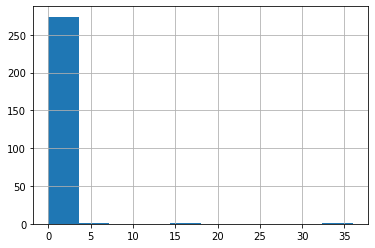

In [23]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count